In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
with open('/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json (1)/Sarcasm_Headlines_Dataset.json','r') as f:
  datastore=[]
  for line in f:
    datastore.append(json.loads(line))
  for item in datastore:
    sentence=item['headline'].lower()
    label=item['is_sarcastic']
    link=item['article_link']

In [ ]:
from bs4 import BeautifulSoup
import string

stopwords=[
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", "be", "because"," been", "before", "being",
     "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't"," did", "didn't", "do", "does", "doesn't", "doing", "don't", "down",
      "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her",
     "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's",
     "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our",
    "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's",
     "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those",
      "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when",
       "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll",
     "you're", "you've", "your", "yours", "yourself", "yourselves"

]
table=str.maketrans(" "," ",string.punctuation)

In [ ]:
sentences=[]
labels=[]
urls=[]
for item in datastore:
  sentence=item['headline'].lower()
  sentence=sentence.replace(',',' , ')
  sentence=sentence.replace('.',' . ')
  sentence=sentence.replace('-',' - ')
  sentence=sentence.replace('/',' / ')
  soup=BeautifulSoup(sentence)
  sentence=soup.get_text()
  words=sentence.split()
  filtered_sentence=''
  for word in words:
    word= word.translate(table)
    if word not in stopwords:
      filtered_sentence=filtered_sentence + word + " "
  sentences.append(filtered_sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

<ipython-input-4-021256c11fa7>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(sentence)


In [ ]:
training_size= 23000
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]
validation_sentences=testing_sentences[0:1500]
validation_labels=testing_labels[0:1500]
print(len(validation_sentences))

1500


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size=20000
max_length=10
trunc_type='post'
oov_token='<OOV>'
tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences, padding='post')
tokenizer.fit_on_texts(testing_sentences)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, padding='post')
tokenizer.fit_on_texts(validation_sentences)
validation_sequences=tokenizer.texts_to_sequences(validation_sentences)
validation_padded=pad_sequences(validation_sequences, padding='post')
print(word_index)

{'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'just': 5, 'will': 6, 'one': 7, 'year': 8, 'report': 9, 'area': 10, 'donald': 11, 'day': 12, 'u': 13, 's': 14, 'can': 15, 'says': 16, 'woman': 17, 'first': 18, 'time': 19, 'like': 20, 'get': 21, 'old': 22, 'trumps': 23, 'now': 24, 'life': 25, 'obama': 26, 'people': 27, 'house': 28, 'women': 29, 'white': 30, 'back': 31, 'still': 32, 'make': 33, 'clinton': 34, '5': 35, 'world': 36, 'americans': 37, 'years': 38, 'way': 39, 'family': 40, 'black': 41, 'study': 42, 'gop': 43, 'best': 44, 'bill': 45, 'american': 46, 'school': 47, 'police': 48, 'watch': 49, '3': 50, 'show': 51, 'really': 52, 'president': 53, 'home': 54, 'last': 55, 'video': 56, 'finds': 57, 'death': 58, 'cant': 59, 'know': 60, '10': 61, 'things': 62, 'good': 63, 'going': 64, 'state': 65, 'hillary': 66, 'love': 67, 'nation': 68, 'may': 69, '2': 70, 'health': 71, 'say': 72, 'parents': 73, 'big': 74, 'every': 75, 'right': 76, 'work': 77, '000': 78, 'need': 79, 'dead': 80, 'kids': 81, '

In [ ]:
import numpy as np
training_padded=np.array(training_padded)
training_labels=np.array(training_labels)
testing_padded=np.array(training_padded)
testing_labels=np.array(testing_labels)
validation_padded=np.array(validation_padded)
validation_labels=np.array(validation_labels)

In [ ]:
embedding_dim=64
vocab_size=20000
model= tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam=tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9,
                              beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [ ]:
history=model.fit(training_padded, training_labels,
                  epochs=30,
                  validation_data=(validation_padded, validation_labels))

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5147 - loss: 0.6921 - val_accuracy: 0.5653 - val_loss: 0.6854
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5600 - loss: 0.6838 - val_accuracy: 0.5653 - val_loss: 0.6815
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5615 - loss: 0.6784 - val_accuracy: 0.5667 - val_loss: 0.6797
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5603 - loss: 0.6728 - val_accuracy: 0.5740 - val_loss: 0.6769
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5814 - loss: 0.6604 - val_accuracy: 0.5840 - val_loss: 0.6731
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6477 - loss: 0.6435 - val_accuracy: 0.5907 - val_loss: 0.6705
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6961 - loss: 0.6186 - val_accuracy: 0.6080 - val_loss: 0.6675
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7256 - loss: 0.5810 - val_accuracy: 

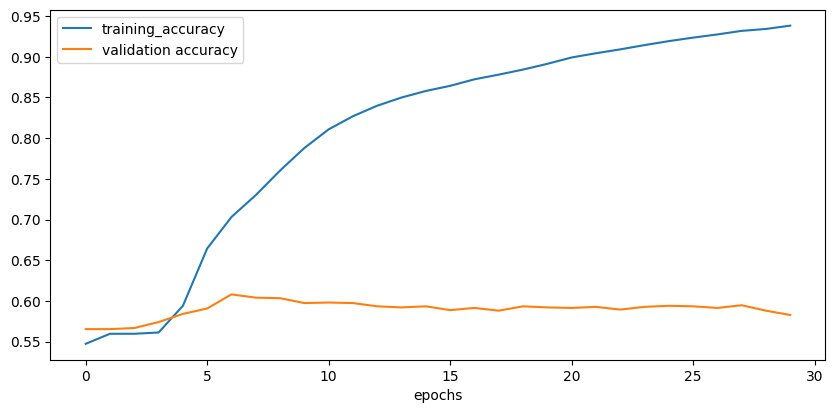

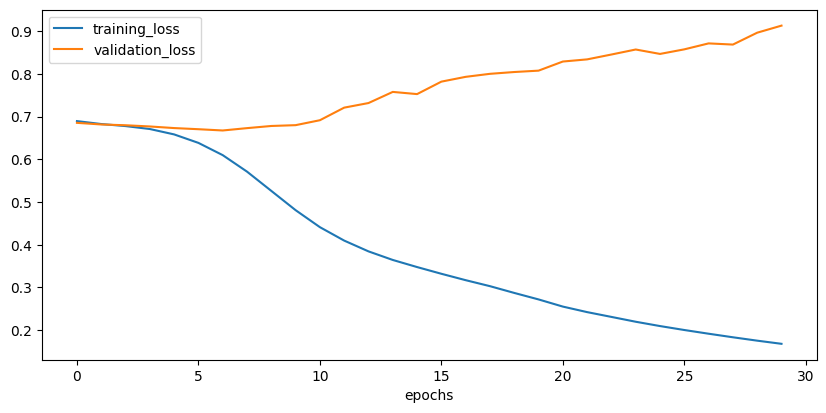

In [ ]:
import matplotlib.pyplot as plt
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
loss=history.history['loss']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                      return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history=model.fit(training_padded,
                  training_labels,
                  epochs=30,
                  validation_data=(validation_padded, validation_labels))

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6952 - loss: 0.5530 - val_accuracy: 0.5487 - val_loss: 0.8868
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9118 - loss: 0.2186 - val_accuracy: 0.5493 - val_loss: 1.1093
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9644 - loss: 0.1029 - val_accuracy: 0.5433 - val_loss: 1.3777
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9812 - loss: 0.0545 - val_accuracy: 0.5487 - val_loss: 1.9810
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9922 - loss: 0.0244 - val_accuracy: 0.5553 - val_loss: 1.8919
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.5567 - val_loss: 2.7418
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9965 - loss: 0.0109 - val_accuracy: 0.5520 - val_loss: 2.7238
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9965 - loss: 0.0109 - va

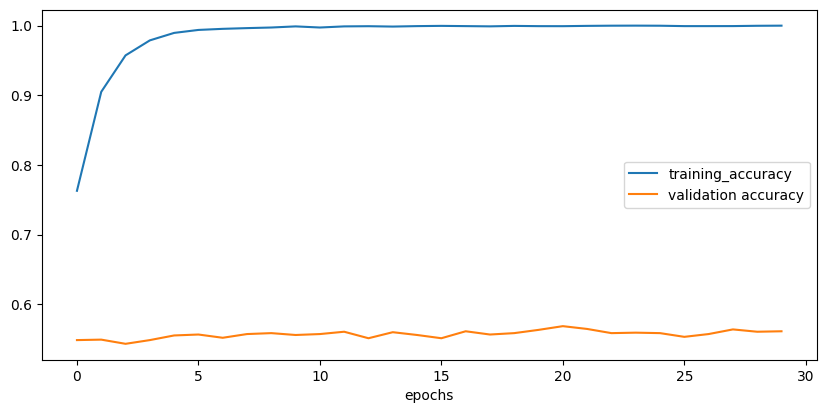

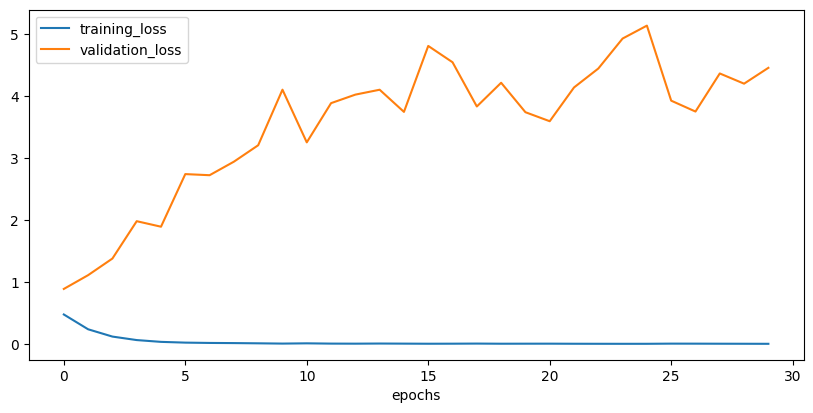

In [ ]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
loss=history.history['loss']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
adam=tf.keras.optimizers.Adam(learning_rate=0.000008,
                              beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
history=model.fit(training_padded,
                  training_labels,
                  epochs=30,
                  validation_data=(validation_padded, validation_labels))

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 1.0000 - loss: 5.7171e-05 - val_accuracy: 0.5587 - val_loss: 4.5460
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 1.0000 - loss: 1.6320e-04 - val_accuracy: 0.5580 - val_loss: 4.5624
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 1.0000 - loss: 1.1832e-04 - val_accuracy: 0.5580 - val_loss: 4.5781
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 1.0000 - loss: 8.4308e-05 - val_accuracy: 0.5580 - val_loss: 4.5943
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 1.0000 - loss: 6.6827e-05 - val_accuracy: 0.5567 - val_loss: 4.6091
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 1.0000 - loss: 1.4597e-04 - val_accuracy: 0.5567 - val_loss: 4.6223
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 1.0000 - loss: 1.3885e-04 - val_accuracy: 0.5573 - val_loss: 4.6362
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 1

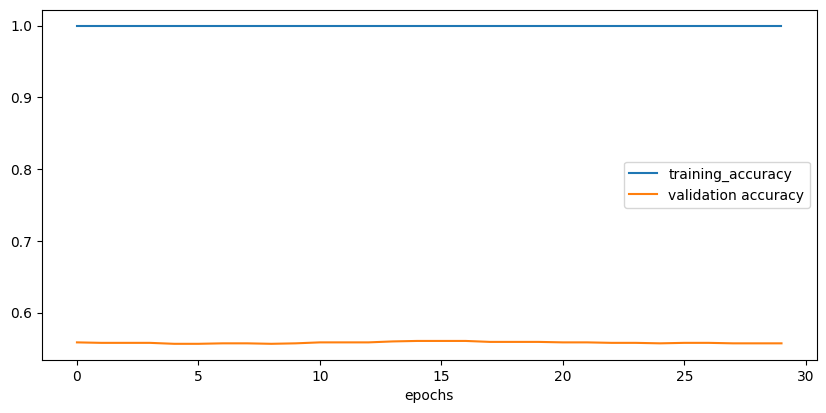

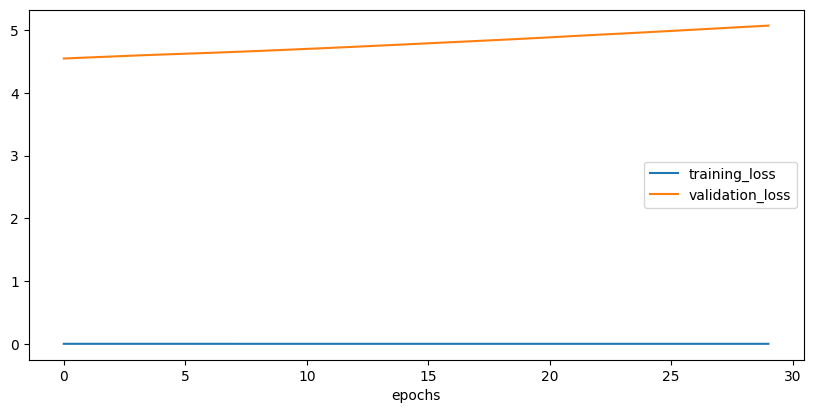

In [ ]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
loss=history.history['loss']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                      return_sequences=True, dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam=tf.keras.optimizers.Adam(learning_rate=0.000008,
                              beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
history=model.fit(training_padded,
                  training_labels,
                  epochs=30,
                  validation_data=(validation_padded, validation_labels))

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.5352 - loss: 0.6917 - val_accuracy: 0.5653 - val_loss: 0.6866
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5544 - loss: 0.6857 - val_accuracy: 0.5653 - val_loss: 0.6836
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5582 - loss: 0.6832 - val_accuracy: 0.5653 - val_loss: 0.6826
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5572 - loss: 0.6815 - val_accuracy: 0.5653 - val_loss: 0.6820
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5596 - loss: 0.6773 - val_accuracy: 0.5660 - val_loss: 0.6806
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5705 - loss: 0.6677 - val_accuracy: 0.5867 - val_loss: 0.6769
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6562 - loss: 0.6349 - val_accuracy: 0.5607 - val_loss: 0.6792
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7498 - loss: 0.5371 - v

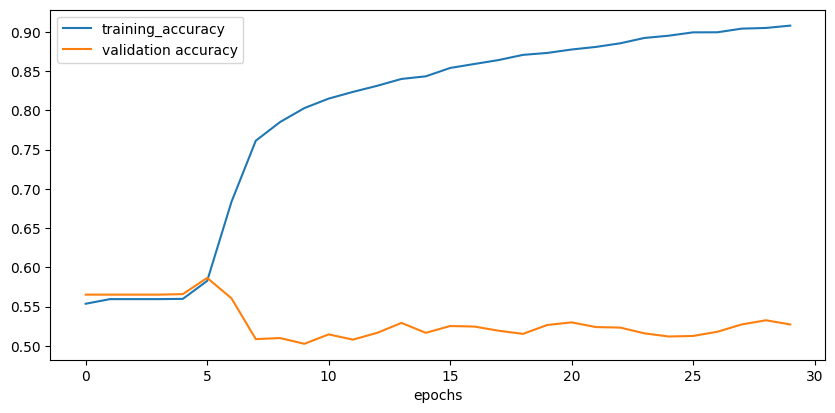

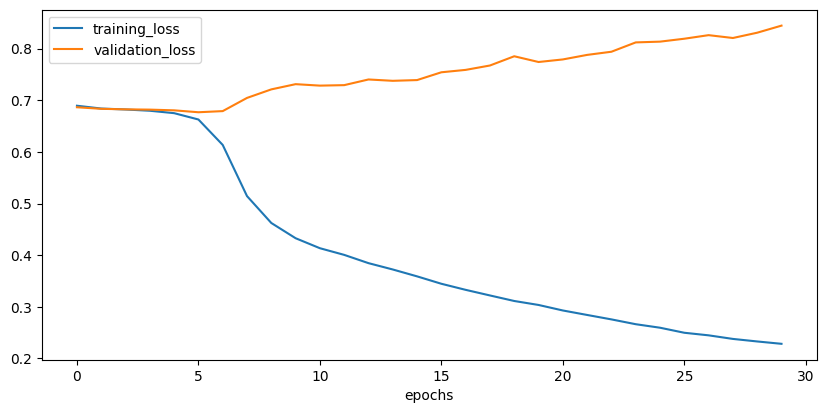

In [ ]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
loss=history.history['loss']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile

local_zip='/content/drive/MyDrive/glove.twitter.27B.100d.pkl.zip'
zip_ref=zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/glove')
zip_ref.close()

In [2]:
embedding_dim=64
vocab_size=20000

In [3]:
glove_embeddings=dict()
f=open('/content/drive/MyDrive/glove.twitter.27B.25d.txt')
for line in f:
  values= line.split()
  word= values[0]
  coefs= np.asarray(values[1:], dtype='float')
  glove_embeddings[word]= coefs
f.close()

In [4]:
glove_embeddings['frog']

array([-1.2158  , -0.74924 ,  0.91941 ,  0.72985 , -0.12917 , -0.19555 ,
        1.2365  , -0.77196 ,  0.85161 ,  0.11922 ,  0.16816 ,  0.33334 ,
       -2.0845  , -0.53471 ,  0.013538,  0.18178 ,  1.2831  ,  0.089331,
        0.57264 ,  0.50694 ,  0.27134 ,  0.66504 ,  0.54097 , -0.58377 ,
        0.67097 ])

In [5]:
import json
with open('/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json (1)/Sarcasm_Headlines_Dataset.json','r') as f:
  datastore=[]
  for line in f:
    datastore.append(json.loads(line))
    print(len(datastore))
  for item in datastore:
    sentence=item['headline'].lower()
    label=item['is_sarcastic']
    link=item['article_link']

Streaming output truncated to the last 5000 lines.
21710
21711
21712
21713
21714
21715
21716
21717
21718
21719
21720
21721
21722
21723
21724
21725
21726
21727
21728
21729
21730
21731
21732
21733
21734
21735
21736
21737
21738
21739
21740
21741
21742
21743
21744
21745
21746
21747
21748
21749
21750
21751
21752
21753
21754
21755
21756
21757
21758
21759
21760
21761
21762
21763
21764
21765
21766
21767
21768
21769
21770
21771
21772
21773
21774
21775
21776
21777
21778
21779
21780
21781
21782
21783
21784
21785
21786
21787
21788
21789
21790
21791
21792
21793
21794
21795
21796
21797
21798
21799
21800
21801
21802
21803
21804
21805
21806
21807
21808
21809
21810
21811
21812
21813
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21842
21843
21844
21845
21846
21847
21848
21849
21850
21851
21852
21853
21854
21855
21856
21857
21858
21859
21860
21861
21862
21863
21864
21865
21866
21867
2

In [6]:
from bs4 import BeautifulSoup
import string

stopwords=[
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", "be", "because"," been", "before", "being",
     "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't"," did", "didn't", "do", "does", "doesn't", "doing", "don't", "down",
      "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her",
     "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's",
     "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our",
    "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's",
     "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those",
      "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when",
       "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll",
     "you're", "you've", "your", "yours", "yourself", "yourselves"

]
table=str.maketrans(" "," ",string.punctuation)

In [7]:
sentences=[]
labels=[]
urls=[]
for item in datastore:
  sentence=item['headline'].lower()
  sentence=sentence.replace(',',' , ')
  sentence=sentence.replace('.',' . ')
  sentence=sentence.replace('-',' - ')
  sentence=sentence.replace('/',' / ')
  soup=BeautifulSoup(sentence)
  sentence=soup.get_text()
  words=sentence.split()
  filtered_sentence=''
  for word in words:
    word= word.translate(table)
    if word not in stopwords:
      filtered_sentence=filtered_sentence + word + " "
  sentences.append(filtered_sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

<ipython-input-7-021256c11fa7>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(sentence)


In [8]:
training_size= 23000
training_sentences=sentences[0:training_size]
testing_sentences=sentences[24001:]
training_labels=labels[0:training_size]
testing_labels=labels[24001:]
validation_sentences=sentences[training_size:24000]
validation_labels=labels[training_size:24000]
print(len(validation_sentences))

1000


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size=20000
max_length=10
trunc_type='post'
oov_token='<OOV>'
tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences, padding='post')
tokenizer.fit_on_texts(testing_sentences)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, padding='post')
tokenizer.fit_on_texts(validation_sentences)
validation_sequences=tokenizer.texts_to_sequences(validation_sentences)
validation_padded=pad_sequences(validation_sequences, padding='post')
print(word_index)

{'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'just': 5, 'will': 6, 'one': 7, 'year': 8, 'report': 9, 'area': 10, 'donald': 11, 'day': 12, 'u': 13, 's': 14, 'can': 15, 'says': 16, 'woman': 17, 'first': 18, 'time': 19, 'like': 20, 'get': 21, 'old': 22, 'trumps': 23, 'now': 24, 'life': 25, 'obama': 26, 'people': 27, 'house': 28, 'women': 29, 'white': 30, 'back': 31, 'still': 32, 'make': 33, 'clinton': 34, '5': 35, 'world': 36, 'americans': 37, 'years': 38, 'way': 39, 'family': 40, 'black': 41, 'study': 42, 'gop': 43, 'best': 44, 'bill': 45, 'american': 46, 'school': 47, 'police': 48, 'watch': 49, '3': 50, 'show': 51, 'really': 52, 'president': 53, 'home': 54, 'last': 55, 'video': 56, 'finds': 57, 'death': 58, 'cant': 59, 'know': 60, '10': 61, 'things': 62, 'good': 63, 'going': 64, 'state': 65, 'hillary': 66, 'love': 67, 'nation': 68, 'may': 69, '2': 70, 'health': 71, 'say': 72, 'parents': 73, 'big': 74, 'every': 75, 'right': 76, 'work': 77, '000': 78, 'need': 79, 'dead': 80, 'kids': 81, '

In [10]:
import numpy as np
training_padded=np.array(training_padded)
training_labels=np.array(training_labels)
testing_padded=np.array(training_padded)
testing_labels=np.array(testing_labels)
validation_padded=np.array(validation_padded)
validation_labels=np.array(validation_labels)

In [11]:
embedding_matrix=np.zeros((vocab_size, 25))
for word, index in tokenizer.word_index.items():
  if index > vocab_size -1:
    break
  else:
    embedding_vector=glove_embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[index]=embedding_vector

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 25,
                              weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [13]:
print("Type of training_padded:", type(training_padded))
print("Data type of training_padded elements:", training_padded.dtype if hasattr(training_padded, "dtype") else "Unknown")

print("Type of training_labels:", type(training_labels))
print("Data type of training_labels elements:", training_labels.dtype if hasattr(training_labels, "dtype") else "Unknown")


Type of training_padded: <class 'numpy.ndarray'>
Data type of training_padded elements: int32
Type of training_labels: <class 'numpy.ndarray'>
Data type of training_labels elements: int64


In [ ]:
print("Type of training_padded:", type(validation_padded))
print("Data type of training_padded elements:", validation_padded.dtype if hasattr(validation_padded, "dtype") else "Unknown")

print("Type of training_labels:", type(validation_labels))
print("Data type of training_labels elements:", validation_labels.dtype if hasattr(validation_labels, "dtype") else "Unknown")


Type of training_padded: <class 'numpy.ndarray'>
Data type of training_padded elements: int32
Type of training_labels: <class 'numpy.ndarray'>
Data type of training_labels elements: <U121


In [ ]:
import pandas as pd

# Convert to a Pandas Series
series = pd.Series(validation_labels)

# Identify non-numeric elements
non_numeric_elements = series[~series.apply(lambda x: isinstance(x, (int, float)))]

print("Non-numeric elements:")
print(non_numeric_elements)


Non-numeric elements:
Series([], dtype: int64)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history=model.fit(
    training_padded,
    training_labels,
    epochs=20,
    validation_data=(validation_padded, validation_labels)
)

Epoch 1/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5653 - loss: 0.6792 - val_accuracy: 0.6070 - val_loss: 0.6657
Epoch 2/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6203 - loss: 0.6443 - val_accuracy: 0.5990 - val_loss: 0.6562
Epoch 3/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6504 - loss: 0.6160 - val_accuracy: 0.5740 - val_loss: 0.6776
Epoch 4/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6768 - loss: 0.5935 - val_accuracy: 0.5840 - val_loss: 0.6819
Epoch 5/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6938 - loss: 0.5687 - val_accuracy: 0.6160 - val_loss: 0.6479
Epoch 6/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7124 - loss: 0.5410 - val_accuracy: 0.6210 - val_loss: 0.6707
Epoch 7/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7327 - loss: 0.5161 - val_accuracy: 0.6220 - val_loss: 0.7061
Epoch 8/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7611 - loss: 0.4785 - val

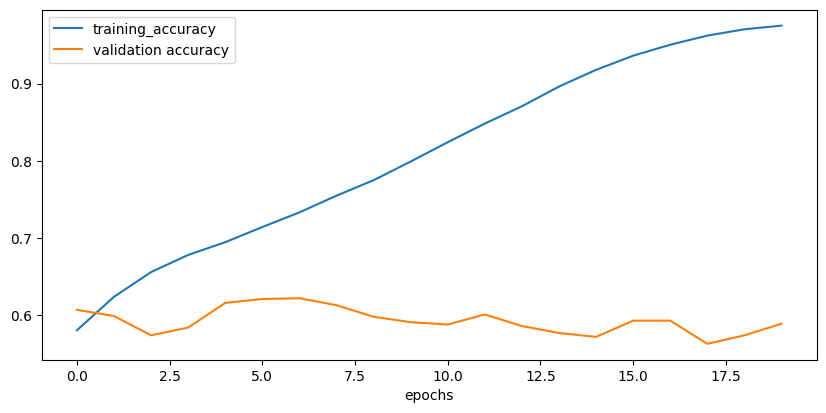

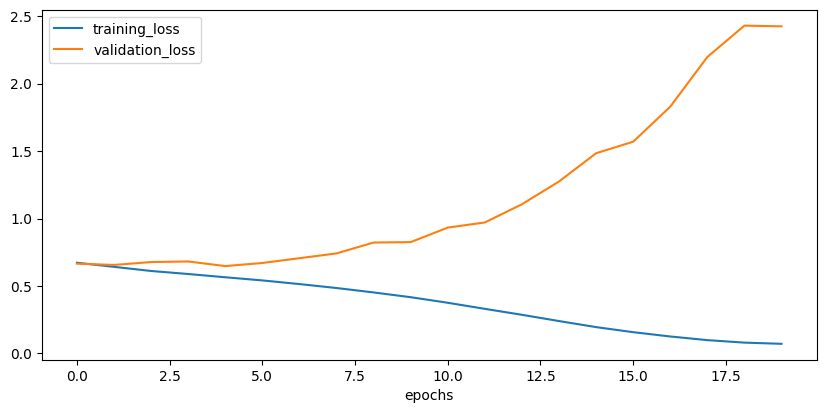

In [ ]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
loss=history.history['loss']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [14]:
xs=[]
ys=[]
cumulative_x=[]
cumulative_y=[]
total_y=0
for word, index in tokenizer.word_index.items():
  xs.append(index)
  cumulative_x.append(index)
  if glove_embeddings.get(word) is not None:
    total_y=total_y + 1
    ys.append(1)
  else:
    ys.append(0)
  cumulative_y.append(total_y/ index)

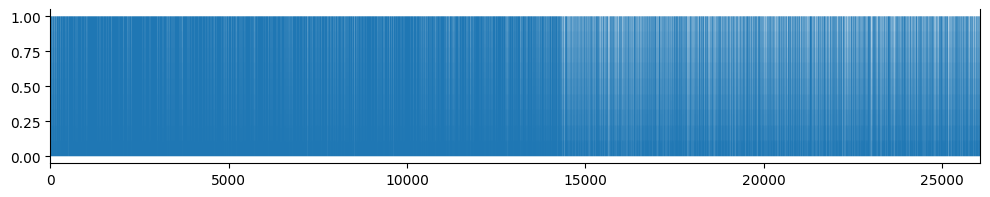

In [15]:
fig, ax= plt.subplots(figsize=(12,2))
ax.spines['top'].set_visible(False)

plt.margins(x=0, y=None, tight=True)
#plt.axis([13000, 14000, 0, 1])
plt.fill(ys)

(0.0, 25000.0, 0.915, 0.985)

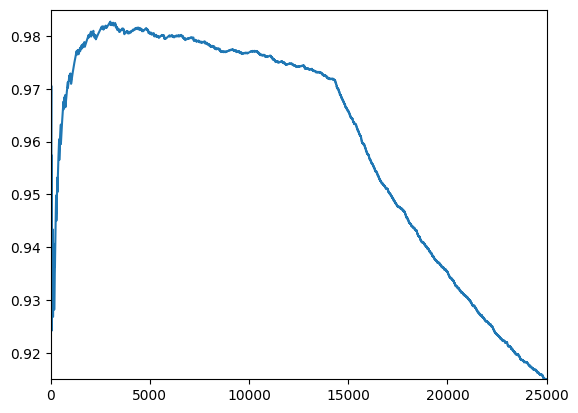

In [16]:
import matplotlib.pyplot as plt
plt.plot(cumulative_x, cumulative_y)
plt.axis([0,25000, .915, .985])

In [20]:
print(embedding_matrix.shape)
print(vocab_size)
'''embedding_matrix = np.zeros((13200, 25))
for word, index in tokenizer.word_index.items():
  if index > vocab_size - 1:
    break
  else:
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector
'''

(13200, 25)
20000


'embedding_matrix = np.zeros((13200, 25))\nfor word, index in tokenizer.word_index.items():\n  if index > vocab_size - 1:\n    break\n  else:\n    embedding_vector = glove_embeddings.get(word)\n    if embedding_vector is not None:\n      embedding_matrix[index] = embedding_vector\n'

In [22]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(13200, 25,
                              weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam=tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [26]:
history=model.fit(training_padded,
                  training_labels,
                  epochs=70,
                  validation_data=(validation_padded, validation_labels))

Epoch 1/70
719/719 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5585 - loss: 0.0000e+00 - val_accuracy: 0.5570 - val_loss: 0.0000e+00
Epoch 2/70
719/719 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5546 - loss: 0.0000e+00 - val_accuracy: 0.5570 - val_loss: 0.0000e+00
Epoch 3/70
719/719 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5617 - loss: 0.0000e+00 - val_accuracy: 0.5570 - val_loss: 0.0000e+00
Epoch 4/70
719/719 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5584 - loss: 0.0000e+00 - val_accuracy: 0.5570 - val_loss: 0.0000e+00
Epoch 5/70
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5632 - loss: 0.0000e+00 - val_accuracy: 0.5570 - val_loss: 0.0000e+00
Epoch 6/70
719/719 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5591 - loss: 0.0000e+00 - val_accuracy: 0.5570 - val_loss: 0.0000e+00
Epoch 7/70
719/719 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5605 - loss: 0.0000e+00 - val_accuracy: 0.5570 - val_loss: 0.0000e+00
Epoch 8/70
719/719 ━━━━━━━━━━━━━━━━━━

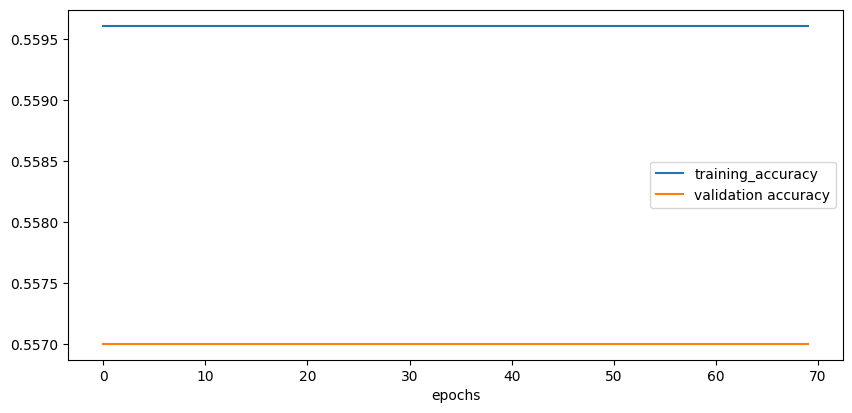

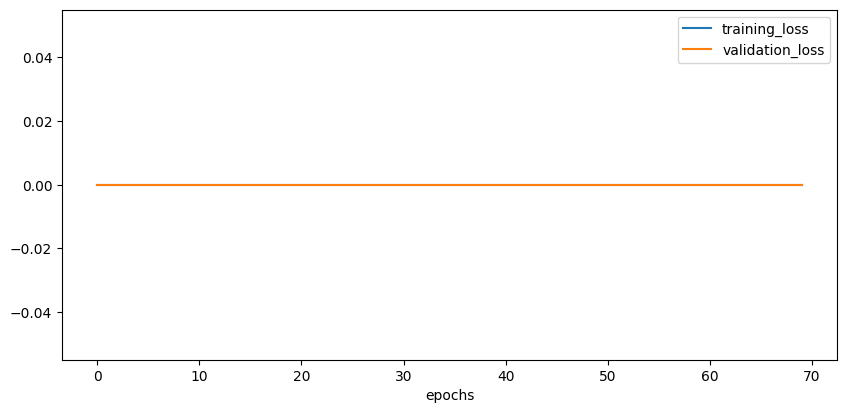

In [27]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
loss=history.history['loss']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [28]:
test_sentences=[
    "It was, for, uh, Medical Reasons, says Doctor to Boris Johnson",
    "Explaining why they had to give him haircut",
    "it's a beautiful sunny day",
    "i lived in ireland, so in high school they made me learn to speak and writein Gaelic",
    "Census Foot Soldiers Swaem Neighbourhoods, Kick Down Doors To Tally Househols Sizes"
]

In [30]:
test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences)
print(model.predict(test_padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
